# New Section
**Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#df=pd.read_csv("")
df=pd.read_csv("/content/archive(2)(1)(1).zip")
pd.set_option('display.max_columns', 40)

In [ ]:
df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [ ]:
 df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

**this dataset have no null value**

In [ ]:
## replace ? with NaN
df = df.replace('?', np.nan)

**Figure of All NULL value**

<Axes: >

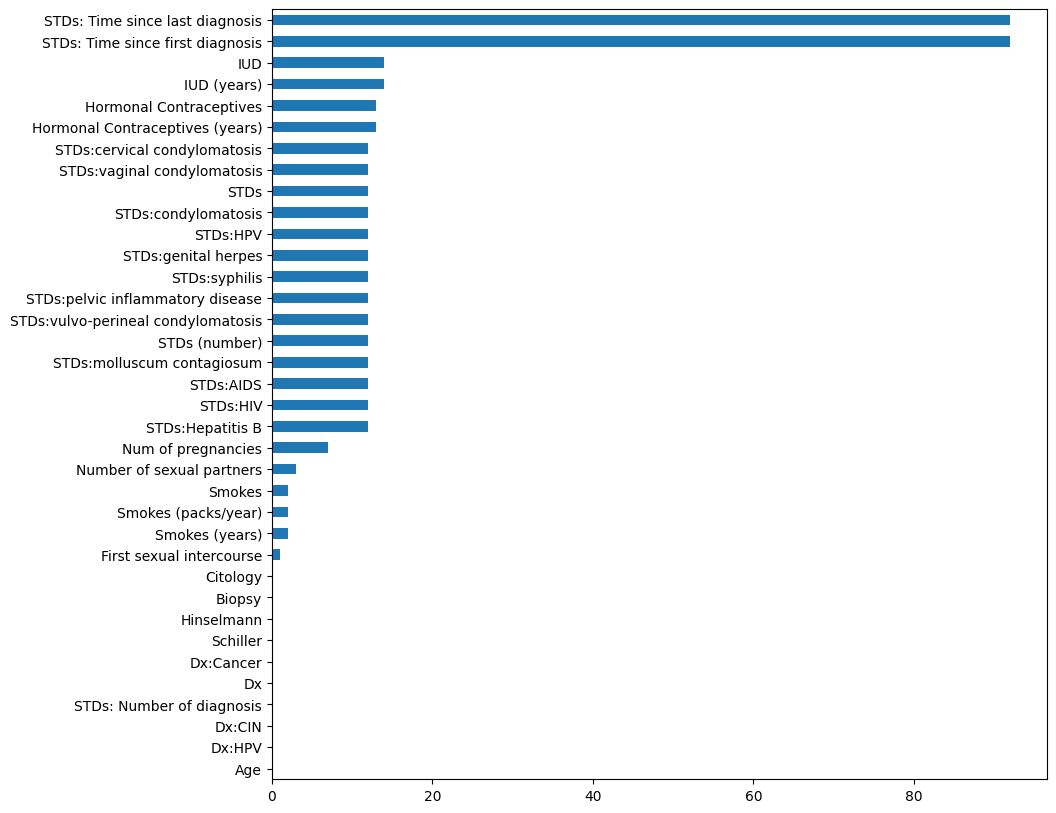

In [ ]:
plt.figure(figsize=(10,10))
np.round(df.isnull().sum()/df.shape[0]*100).sort_values().plot(kind='barh')

**Removing value with more than 80 percent NULL value**

In [ ]:
# Remove columns with a high percentage of null entries
df = df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis =1)

**dropping target value before KNN**

In [ ]:
df.columns = df.columns.str.strip()  # remove spaces
df.columns = df.columns.str.lower()  # convert all to lowercase


In [ ]:
X=df.drop(columns=["biopsy"])

**Filling NULL values with KNN imputer**

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Impute missing values
df_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

df_imputed.isnull().sum()



,0
age,0
number of sexual partners,0
first sexual intercourse,0
num of pregnancies,0
smokes,0
smokes (years),0
smokes (packs/year),0
hormonal contraceptives,0
hormonal contraceptives (years),0
iud,0


**check class imbalance**

Class distribution (%):
 biopsy
0    93.589744
1     6.410256
Name: count, dtype: float64
Class imbalance ratio (minority/majority): 0.068


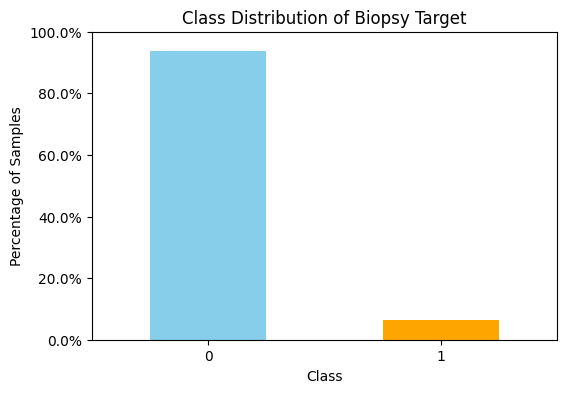

In [ ]:
import matplotlib.pyplot as plt

# Check class imbalance
class_counts = df['biopsy'].value_counts()
total = class_counts.sum()

# Convert counts to percentages
class_percentages = (class_counts / total) * 100

print("Class distribution (%):\n", class_percentages)
imbalance_ratio = class_counts.min() / class_counts.max()
print(f"Class imbalance ratio (minority/majority): {imbalance_ratio:.3f}")

# Visualization
plt.figure(figsize=(6, 4))
class_percentages.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution of Biopsy Target')
plt.xlabel('Class')
plt.ylabel('Percentage of Samples')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1f}%'))
plt.show()


**kernal density plot**

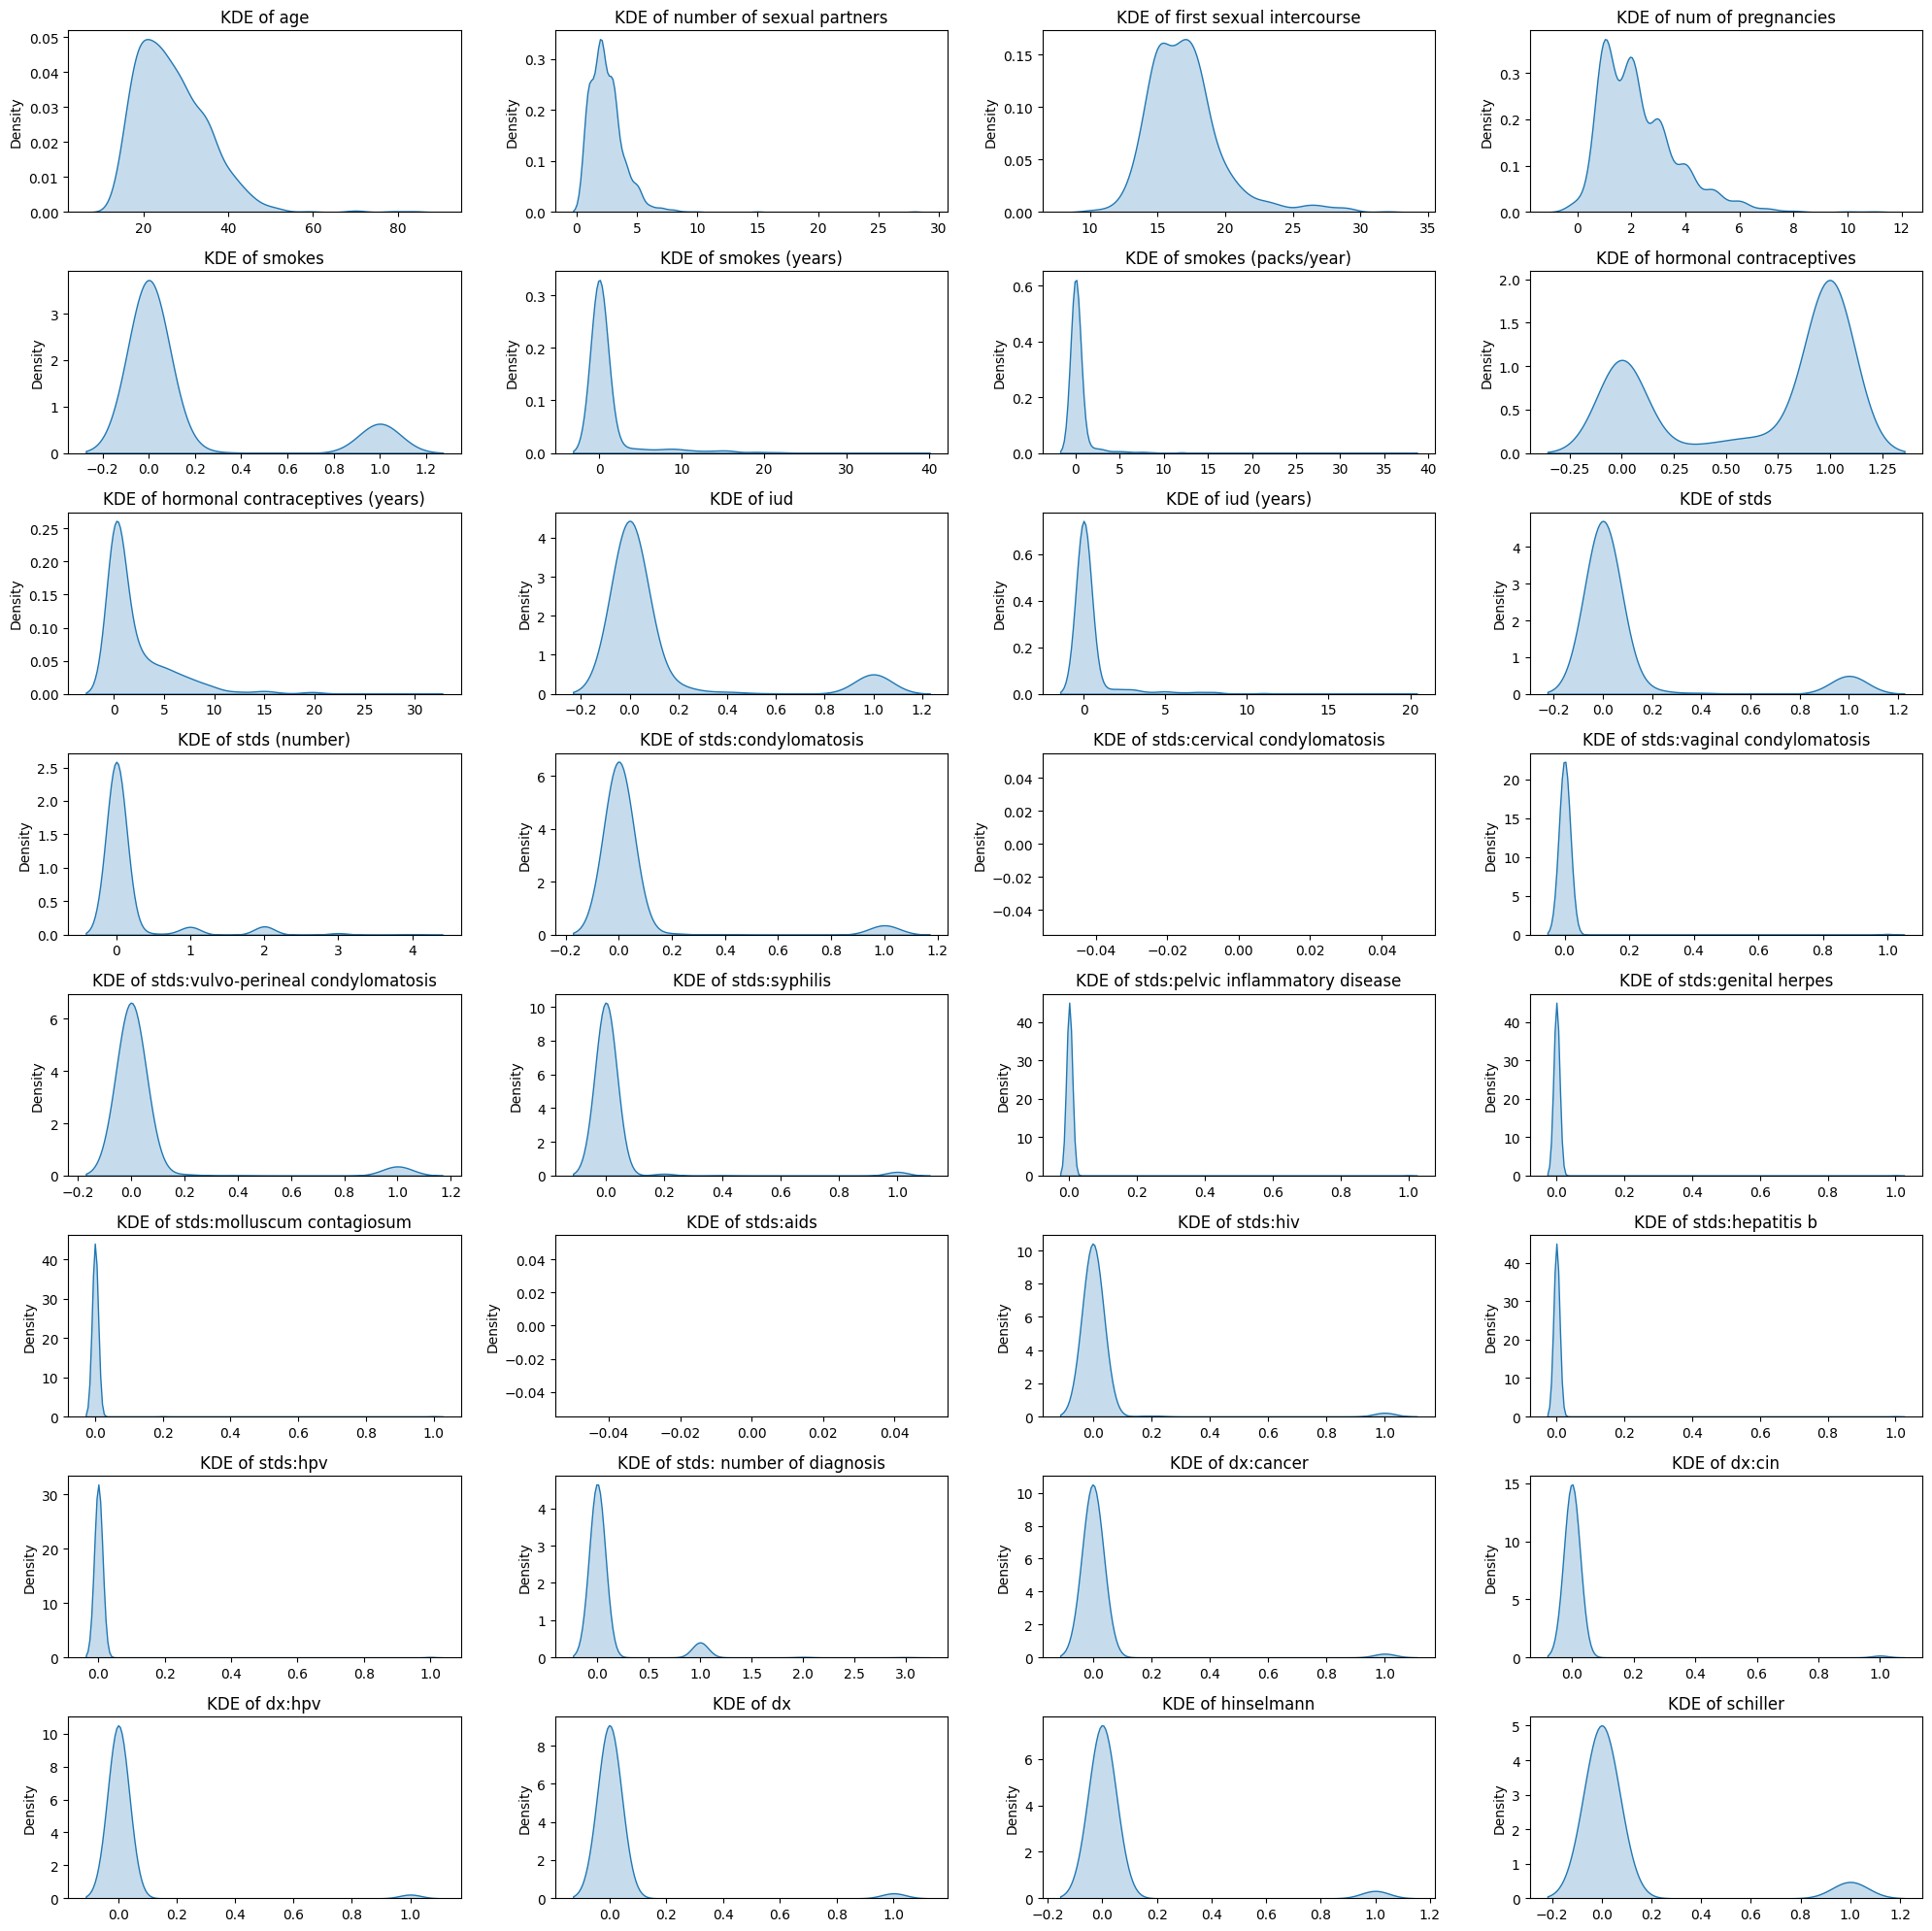

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: assume df is your DataFrame of 32 features
# df = pd.read_csv('your_data.csv')  # load your data here

num_features = 32
features = df_imputed.columns[:num_features]  # select 32 feature columns

# Create a grid of subplots
rows, cols = 8, 4  # 8 rows, 4 columns
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

axes = axes.flatten()  # flatten for easy iteration

for i, feature in enumerate(features):
    sns.kdeplot(df_imputed[feature], ax=axes[i], fill=True)
    axes[i].set_title(f'KDE of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

# Remove any unused subplots if less than grid size
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




SMOTE

identify minority class


In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Define target
Y = df["biopsy"]
print(f"Original class distribution: {Counter(Y)}")

# Initialize SMOTE (oversample minority only)
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(df_imputed, Y)

# Check results
print(f"Resampled class distribution: {Counter(y_resampled)}")


Original class distribution: Counter({0: 803, 1: 55})
Resampled class distribution: Counter({0: 803, 1: 803})


Kernel plot after SMOTE

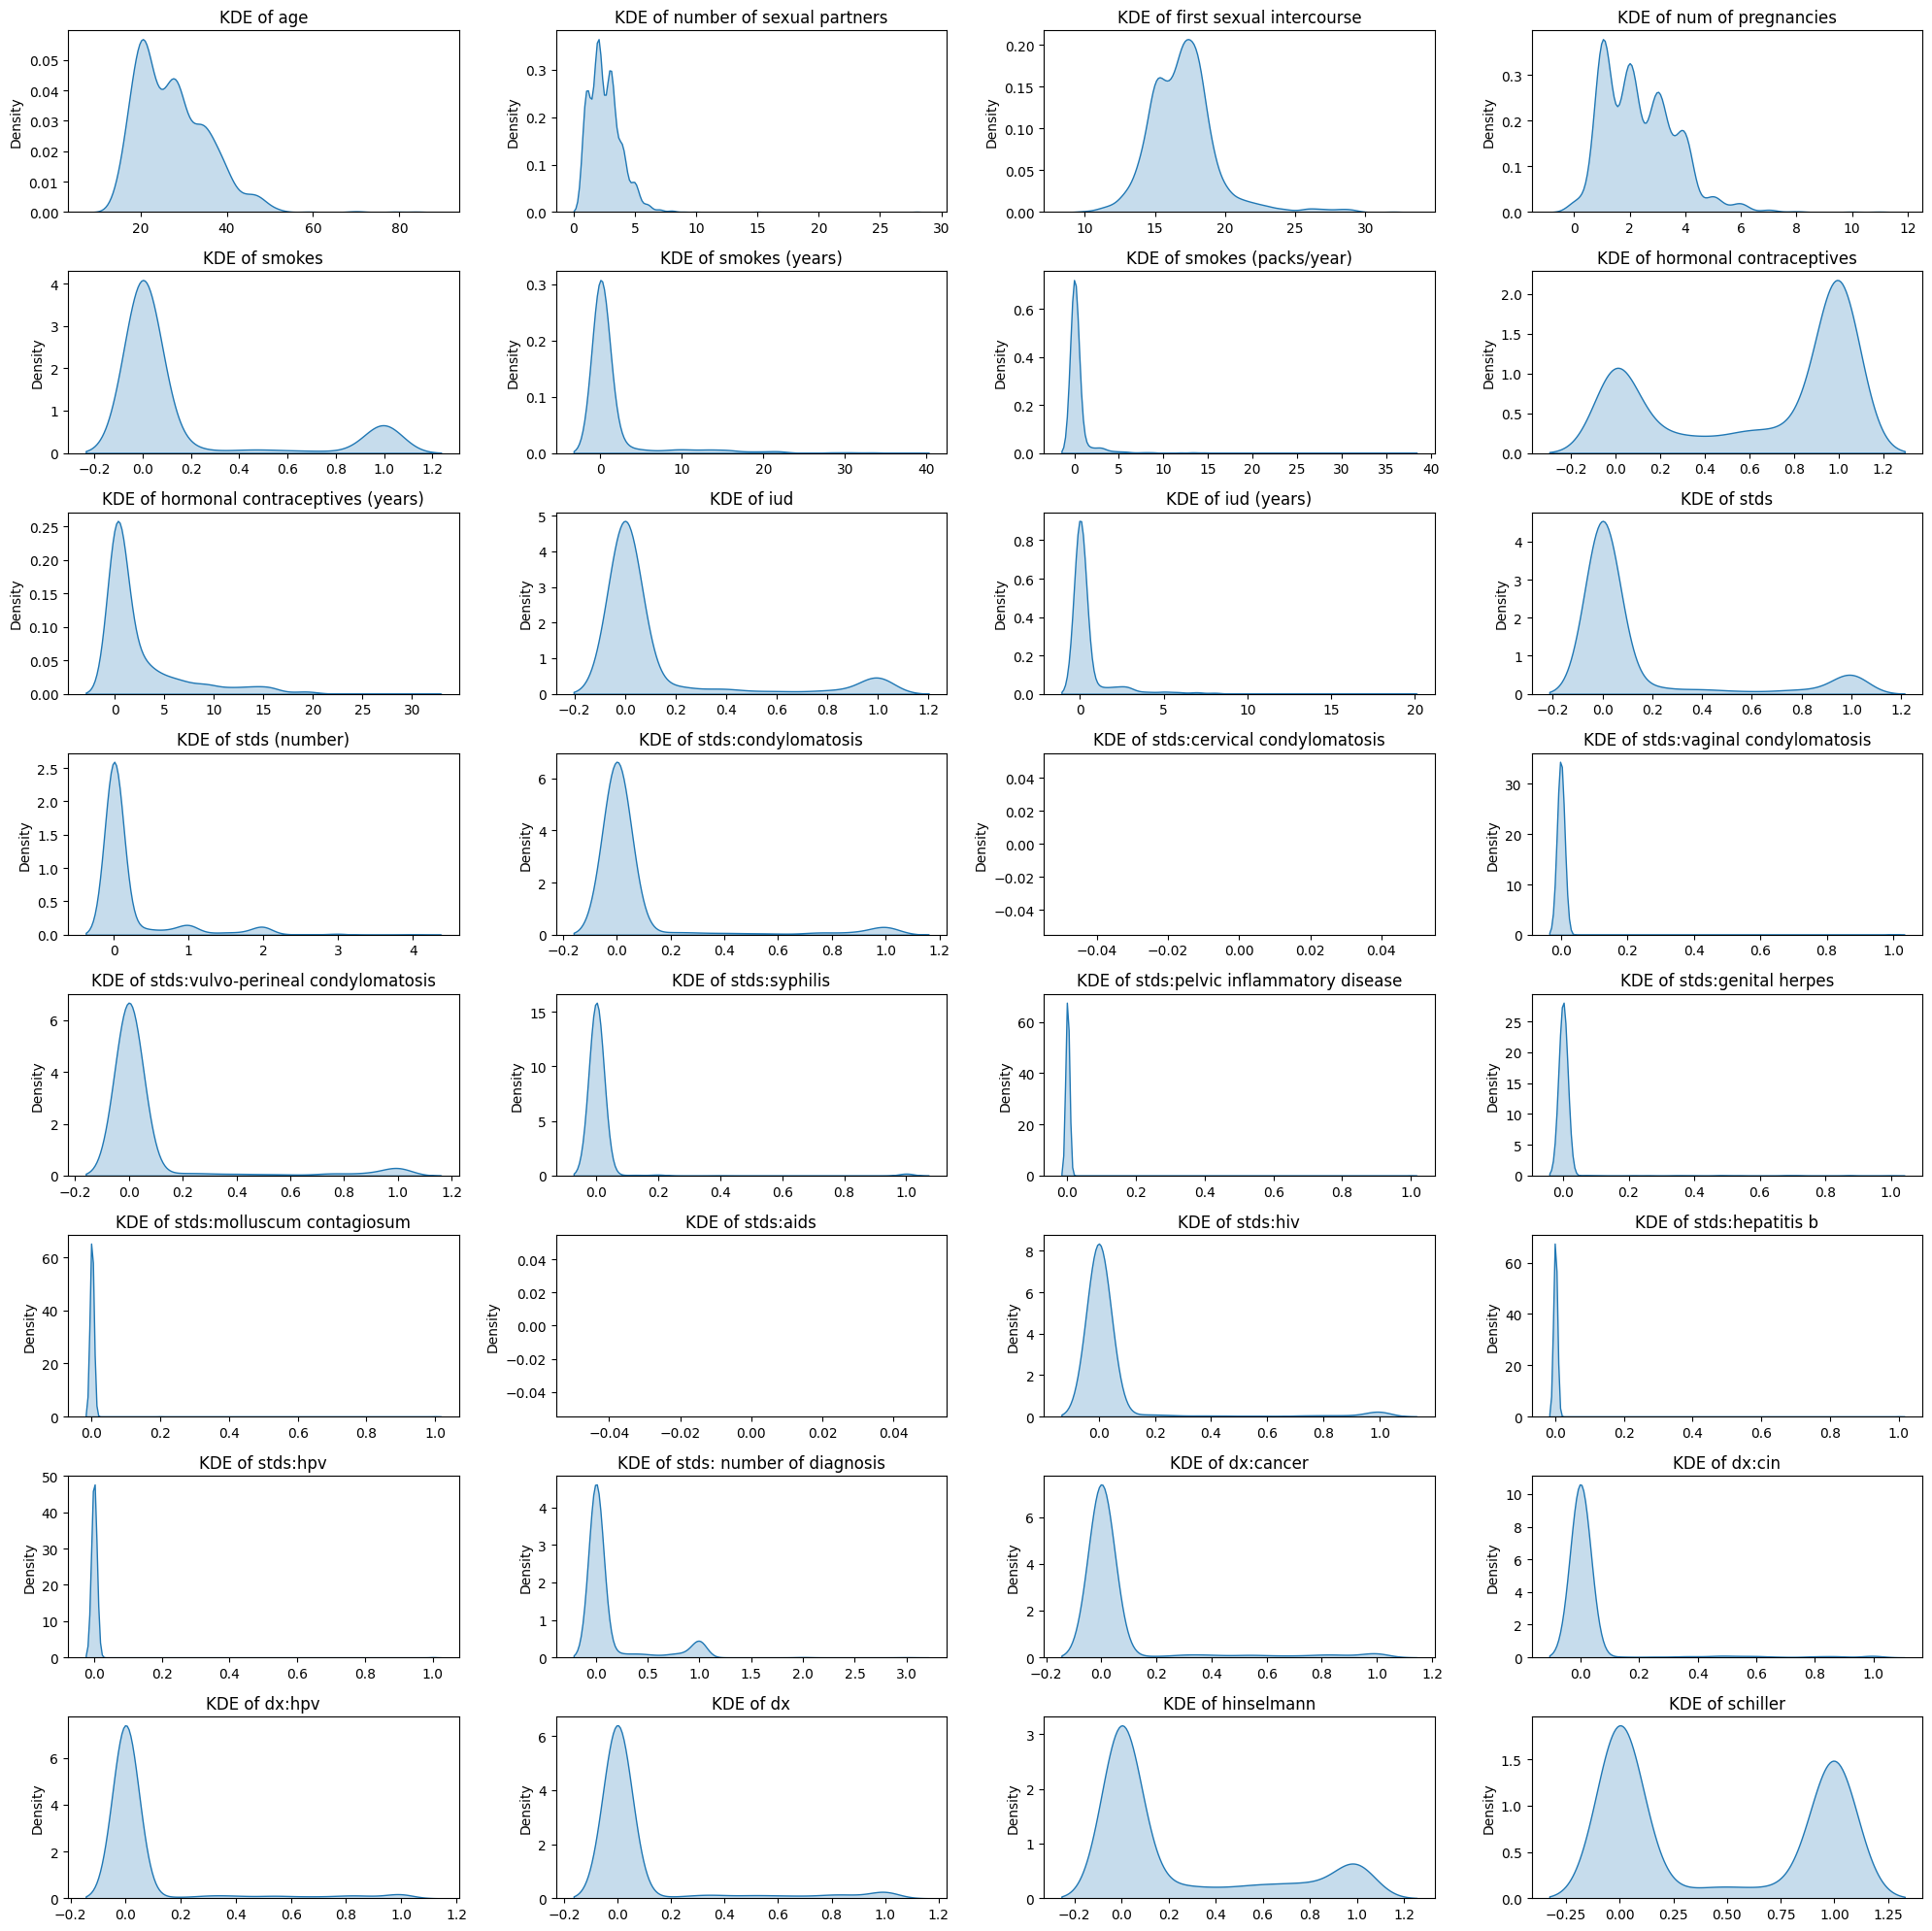

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: assume df is your DataFrame of 32 features
# df = pd.read_csv('your_data.csv')  # load your data here

num_features = 32
features = X_resampled.columns[:num_features]  # select 32 feature columns

# Create a grid of subplots
rows, cols = 8, 4  # 8 rows, 4 columns
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

axes = axes.flatten()  # flatten for easy iteration

for i, feature in enumerate(features):
    sns.kdeplot(X_resampled[feature], ax=axes[i], fill=True)
    axes[i].set_title(f'KDE of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

# Remove any unused subplots if less than grid size
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**data distribition **

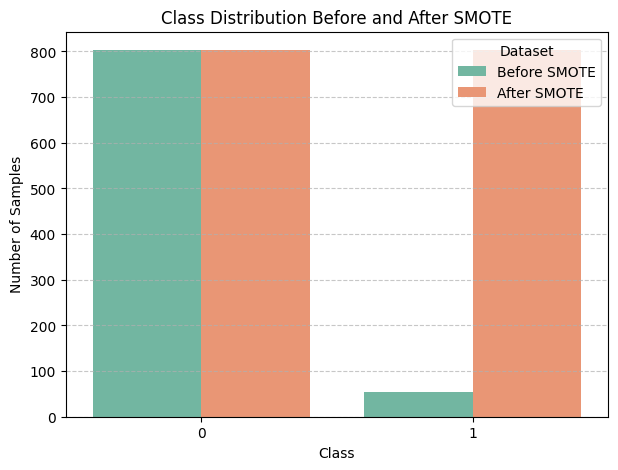

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE

# 1. Original distribution
Y = df["biopsy"]
orig_counts = Counter(Y)

# 2. Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_imputed, Y)
res_counts = Counter(y_resampled)

# 3. Convert to DataFrame for plotting
def make_dist_df(counter, label):
    df_temp = pd.DataFrame.from_dict(counter, orient='index', columns=['Count'])
    df_temp['Class'] = df_temp.index
    df_temp['Dataset'] = label
    return df_temp.reset_index(drop=True)

before_df = make_dist_df(orig_counts, "Before SMOTE")
after_df = make_dist_df(res_counts, "After SMOTE")

dist_df = pd.concat([before_df, after_df])

# 4. Plot grouped bar chart
plt.figure(figsize=(7, 5))
sns.barplot(data=dist_df, x='Class', y='Count', hue='Dataset', palette='Set2')

plt.title("Class Distribution Before and After SMOTE")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.legend(title="Dataset")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler to scale data to range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit scaler and transform data
scaled_X = scaler.fit_transform( X_resampled)


**MODEL train **

XGboost

catboost

gradientboosting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, y_resampled, test_size=0.2, random_state=42)

In [ ]:

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Initialize the XGBoost classifier
model_XG = XGBClassifier(
    n_estimators=100,       # Number of boosted trees (rounds)
    max_depth=3,            # Maximum tree depth for base learners
    learning_rate=0.1,      # Step size shrinkage to prevent overfitting
    use_label_encoder=False, # Suppress warning for label encoding
    eval_metric='logloss',  # Evaluation metric for early stopping
    random_state=42
)

# Train the model on the training data
model_XG.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = model_XG.predict(X_test)



# Evaluate the accuracy
accuracy = accuracy_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred, average='weighted')
precision = precision_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9783
Recall: 0.9783
Precision: 0.9788
F1 Score: 0.9783


In [ ]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# LightGBM classifier initialization and training
model_LGBM = LGBMClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)
model_LGBM.fit(X_train, Y_train)
y_pred_lgbm = model_LGBM.predict(X_test)

accuracy_lgbm = accuracy_score(Y_test, y_pred_lgbm)
recall_lgbm = recall_score(Y_test, y_pred_lgbm, average='weighted')
precision_lgbm = precision_score(Y_test, y_pred_lgbm, average='weighted')
f1_lgbm = f1_score(Y_test, y_pred_lgbm, average='weighted')

print(f"LightGBM Accuracy: {accuracy_lgbm:.4f}")
print(f"LightGBM Recall: {recall_lgbm:.4f}")
print(f"LightGBM Precision: {precision_lgbm:.4f}")
print(f"LightGBM F1 Score: {f1_lgbm:.4f}")

# CatBoost classifier initialization and training
model_cat = CatBoostClassifier(
    iterations=100,
    depth=3,
    learning_rate=0.1,
    random_seed=42,
    verbose=0  # silent mode
)
model_cat.fit(X_train, Y_train)
y_pred_cat = model_cat.predict(X_test)

accuracy_cat = accuracy_score(Y_test, y_pred_cat)
recall_cat = recall_score(Y_test, y_pred_cat, average='weighted')
precision_cat = precision_score(Y_test, y_pred_cat, average='weighted')
f1_cat = f1_score(Y_test, y_pred_cat, average='weighted')

print(f"CatBoost Accuracy: {accuracy_cat:.4f}")
print(f"CatBoost Recall: {recall_cat:.4f}")
print(f"CatBoost Precision: {precision_cat:.4f}")
print(f"CatBoost F1 Score: {f1_cat:.4f}")


[LightGBM] [Info] Number of positive: 660, number of negative: 624
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2610
[LightGBM] [Info] Number of data points in the train set: 1284, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514019 -> initscore=0.056089
[LightGBM] [Info] Start training from score 0.056089
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

**ROC curve**

[LightGBM] [Info] Number of positive: 660, number of negative: 624
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2610
[LightGBM] [Info] Number of data points in the train set: 1284, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514019 -> initscore=0.056089
[LightGBM] [Info] Start training from score 0.056089
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


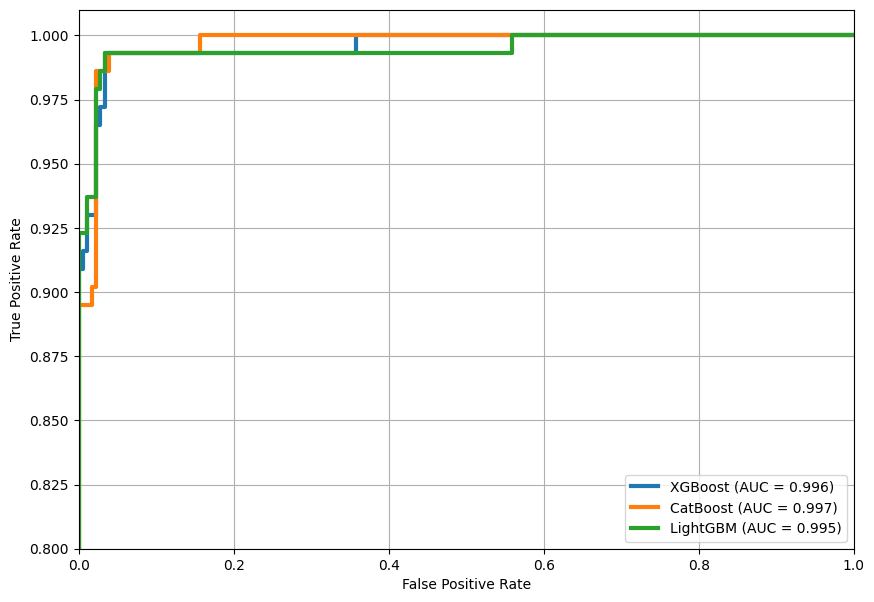

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Initialize models
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
cat_model = CatBoostClassifier(verbose=0, random_seed=42)
lgbm_model = LGBMClassifier(random_state=42)

# Train models
xgb_model.fit(X_train, Y_train)
cat_model.fit(X_train, Y_train)
lgbm_model.fit(X_train, Y_train)

# Predict probabilities for positive class
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
cat_probs = cat_model.predict_proba(X_test)[:, 1]
lgbm_probs = lgbm_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for each model
xgb_fpr, xgb_tpr, _ = roc_curve(Y_test, xgb_probs)
xgb_auc = auc(xgb_fpr, xgb_tpr)

cat_fpr, cat_tpr, _ = roc_curve(Y_test, cat_probs)
cat_auc = auc(cat_fpr, cat_tpr)

lgbm_fpr, lgbm_tpr, _ = roc_curve(Y_test, lgbm_probs)
lgbm_auc = auc(lgbm_fpr, lgbm_tpr)

# Plot ROC curves for all models
plt.figure(figsize=(10, 7))
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.3f})', linewidth=3)
plt.plot(cat_fpr, cat_tpr, label=f'CatBoost (AUC = {cat_auc:.3f})', linewidth=3)
plt.plot(lgbm_fpr, lgbm_tpr, label=f'LightGBM (AUC = {lgbm_auc:.3f})', linewidth=3)
#plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1.0])
plt.ylim([0.8, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# New Section
Using SHAP

In [ ]:
!pip install shap

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Initialize SHAP JS visualization
shap.initjs()

# Create TreeExplainer for your model (replace model_gb with your trained model)
explainer = shap.TreeExplainer(model_XG)

# Calculate SHAP values
shap_values = explainer.shap_values(X_resampled)

print("Variable Importance Plot - Global Interpretation")
plt.figure()

# Pass feature data with column names so that feature names show properly
shap.summary_plot(shap_values, X_resampled)

# Optional: if you want to save the plot
# plt.savefig("shap_summary_plot.png", bbox_inches='tight')


In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Initialize SHAP JS visualization
shap.initjs()

# Create TreeExplainer for your model (replace model_gb with your trained model)
explainer = shap.TreeExplainer(model_LGBM)

# Calculate SHAP values
shap_values = explainer.shap_values(X_resampled)

print("Variable Importance Plot - Global Interpretation")
plt.figure()

# Pass feature data with column names so that feature names show properly
shap.summary_plot(shap_values, X_resampled)

# Optional: if you want to save the plot
# plt.savefig("shap_summary_plot.png", bbox_inches='tight')


**bayesian optication**

In [ ]:
#pip install GPyOpt


In [ ]:
!pip install scikit-optimize


**BO for XGboost**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import xgboost as xgb
from scipy.stats import randint, uniform


param_dist = {
    'max_depth': randint(3, 16),
    'min_child_weight': randint(1, 20),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(100, 1000),
    # Note: we won’t include early_stopping_rounds here; we’ll add it separately
}

# When you build XGBRegressor, include early_stopping_rounds as a parameter
xgb_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    verbosity=0,
    n_jobs=-1,
    early_stopping_rounds=30  # Move early stopping here
)

random_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=2024,
    return_train_score=True,
    n_jobs=-1
)

random_search.fit(
    X_train, Y_train,
    eval_set=[(X_test, Y_test)],
    # Note: no early_stopping_rounds in fit()
    verbose=False
)

print("Best params:", random_search.best_params_)
print("Best CV score:", random_search.best_score_)

best_model = random_search.best_estimator_
y_test_pred = best_model.predict(X_test)


after beyesian and cross validation

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, make_scorer)
import xgboost as xgb
import numpy as np


# 2. Use the “best params” you found (but for classification)
best_params = {
    'colsample_bytree': 0.6212288269741509,
    'gamma': 0.09173729365148209,
    'learning_rate': 0.24371944726297473,
    'max_depth': 13,
    'min_child_weight': 2,
    'n_estimators': 250,
    'reg_alpha': 0.37676543068544677,
    'reg_lambda': 0.819364696449859,
    'subsample': 0.7080362597546253
}

# 3. Initialize classifier (XGBoost classifier) with those params
model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',  # or appropriate metric
    **best_params,
    n_jobs=-1
)

# 4. 10-fold cross-validation with classification metrics
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define scoring metrics for cross_validate
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

cv_result = cross_validate(
    model,
    X_train, Y_train,
    cv=kf,
    scoring=scoring,
    return_train_score=False,
    n_jobs=-1,
    verbose=1
)

print("CV results (10-fold):")
for metric in scoring:
    vals = cv_result['test_' + metric]
    print(f"  {metric}: mean = {np.mean(vals):.4f}, std = {np.std(vals):.4f}")

# 5. Train final model on full training data, then evaluate on test
model.fit(X_train, Y_train)

y_test_pred = model.predict(X_test)

acc = accuracy_score(Y_test, y_test_pred)
prec = precision_score(Y_test, y_test_pred, average='macro', zero_division=0)
rec = recall_score(Y_test, y_test_pred, average='macro', zero_division=0)
f1 = f1_score(Y_test, y_test_pred, average='macro', zero_division=0)

print("\nTest set metrics:")
print(f"  Accuracy:  {acc:.4f}")
print(f"  Precision: {prec:.4f}")
print(f"  Recall:    {rec:.4f}")
print(f"  F1 score:  {f1:.4f}")




**BO for CATboost**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
from scipy.stats import randint, uniform

# Define narrower hyperparameter distributions
param_dist = {
    'depth': randint(4, 11),  # Depth range limited to 4-10
    'learning_rate': uniform(0.01, 0.09),  # Smaller max learning rate = 0.1
    'l2_leaf_reg': randint(2, 11),  # Slightly restricted range
    'bagging_temperature': uniform(0.0, 1.0),
    'border_count': randint(32, 127),  # Smaller range for faster training
    'random_strength': uniform(0.0, 10.0),
    'iterations': randint(100, 301),  # Max 300 iterations to reduce training time
}

# Initialize CatBoostRegressor with early stopping
cat_reg = CatBoostRegressor(
    loss_function='RMSE',
    verbose=0,
    early_stopping_rounds=30,
    use_best_model=True,
    random_seed=2024,
)

# Use fewer iterations and folds for randomized search
random_search = RandomizedSearchCV(
    estimator=cat_reg,
    param_distributions=param_dist,
    n_iter=15,  # Reduced number of parameter settings to try
    scoring='neg_mean_squared_error',
    cv=2,  # Reduced number of folds for cross-validation
    verbose=2,
    random_state=2024,
    return_train_score=True,
    n_jobs=-1,
)

# Fit the model using eval_set for early stopping
random_search.fit(
    X_train, Y_train,
    eval_set=(X_test, Y_test),
    verbose=False,
)

print("Best params:", random_search.best_params_)
print("Best CV score:", random_search.best_score_)

best_model = random_search.best_estimator_
y_test_pred = best_model.predict(X_test)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Assuming you have the original dataframe X_shap from which scaling was done,
# use its columns for the DataFrame constructed from scaled_X numpy array:
scaled_X_df = pd.DataFrame(scaled_X)

best_params = {
    'bagging_temperature': 0.01648793481663091,
    'border_count': 82,
    'depth': 7,
    'iterations': 278,
    'l2_leaf_reg': 4,
    'learning_rate': 0.0911894234127578,
    'random_strength': 8.740398003743294,
    'min_data_in_leaf': 20,
    'loss_function': 'Logloss',
    'verbose': 0,
    'random_seed': 2024
}

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracies, recalls, precisions, f1s = [], [], [], []

for fold, (train_index, test_index) in enumerate(kf.split(scaled_X_df, y_resampled), 1):
    X_train, X_test = scaled_X_df.iloc[train_index], scaled_X_df.iloc[test_index]
    Y_train, Y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    model_cb = CatBoostClassifier(**best_params)
    model_cb.fit(
        X_train, Y_train,
        eval_set=(X_test, Y_test),
        early_stopping_rounds=30,
        use_best_model=True,
        verbose=False
    )

    y_pred = model_cb.predict(X_test)

    accuracies.append(accuracy_score(Y_test, y_pred))
    recalls.append(recall_score(Y_test, y_pred, average='weighted'))
    precisions.append(precision_score(Y_test, y_pred, average='weighted'))
    f1s.append(f1_score(Y_test, y_pred, average='weighted'))

    print(f"Fold {fold} done.")

print(f"Mean Accuracy: {np.mean(accuracies):.5f}")
print(f"Mean Recall: {np.mean(recalls):.5f}")
print(f"Mean Precision: {np.mean(precisions):.5f}")
print(f"Mean F1 Score: {np.mean(f1s):.5f}")


**BO for light GBM**

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

# Define a narrower hyperparameter distribution for LightGBM
param_dist = {
    'num_leaves': randint(20, 51),          # number of leaves in one tree
    'learning_rate': uniform(0.01, 0.09),   # learning rate between 0.01 and 0.1
    'n_estimators': randint(100, 301),      # number of boosting iterations max 300
    'max_depth': randint(4, 11),             # limit max depth between 4 and 10
    'min_child_samples': randint(10, 41),   # minimum number of data points in a leaf
    'subsample': uniform(0.6, 0.4),          # subsample ratio of the training instance
    'colsample_bytree': uniform(0.6, 0.4),   # subsample ratio of columns when constructing each tree
}

# Initialize LightGBM regressor
lgb_reg = lgb.LGBMRegressor(random_state=2024)

# Setup RandomizedSearchCV with fewer iterations and folds for speed
random_search = RandomizedSearchCV(
    estimator=lgb_reg,
    param_distributions=param_dist,
    n_iter=15,        # reduced number of samples
    scoring='neg_mean_squared_error',
    cv=2,             # reduced folds for cross-validation
    verbose=2,
    random_state=2024,
    n_jobs=-1,
    return_train_score=True,
)

# Fit the model
random_search.fit(X_train, Y_train)

print("Best params:", random_search.best_params_)
print("Best CV score:", random_search.best_score_)

# Predict with the best estimator
best_model = random_search.best_estimator_
y_test_pred = best_model.predict(X_test)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

scaled_X = pd.DataFrame(scaled_X)

# Define LightGBM parameters
params = {
   'colsample_bytree': 0.8352058075581592,
    'learning_rate': 0.07291978729134242,
    'max_depth': 7,
    'min_child_samples': 14,
    'n_estimators': 290,
    'num_leaves': 43,
    'subsample': 0.6820075809577155,
    'random_state': 2024
}

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracies, recalls, precisions, f1s = [], [], [], []

for train_index, test_index in kf.split(scaled_X, y_resampled):
    X_train, X_test = scaled_X.iloc[train_index], scaled_X.iloc[test_index]
    Y_train, Y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    model_lgb = lgb.LGBMClassifier(**params)
    model_lgb.fit(X_train, Y_train)

    y_pred = model_lgb.predict(X_test)

    accuracies.append(accuracy_score(Y_test, y_pred))
    recalls.append(recall_score(Y_test, y_pred, average='weighted'))
    precisions.append(precision_score(Y_test, y_pred, average='weighted'))
    f1s.append(f1_score(Y_test, y_pred, average='weighted'))

print(f"Mean Accuracy: {np.mean(accuracies):.5f}")
print(f"Mean Recall: {np.mean(recalls):.5f}")
print(f"Mean Precision: {np.mean(precisions):.5f}")
print(f"Mean F1 Score: {np.mean(f1s):.5f}")

# drop feature that has low feature importance
taking top 5

In [ ]:
# Convert NumPy array to DataFrame with column names if available
X_resampled_df = pd.DataFrame(X_resampled)

columns_to_drop = [
     'number of sexual partners', 'first sexual intercourse',
       'num of pregnancies', 'smokes', 'smokes (years)', 'smokes (packs/year)',
       'hormonal contraceptives', 'hormonal contraceptives (years)', 'iud',
       'iud (years)', 'stds (number)', 'stds:condylomatosis',
       'stds:cervical condylomatosis', 'stds:vaginal condylomatosis',
       'stds:vulvo-perineal condylomatosis', 'stds:syphilis',
       'stds:pelvic inflammatory disease', 'stds:genital herpes',
       'stds:molluscum contagiosum', 'stds:aids', 'stds:hiv',
       'stds:hepatitis b', 'stds:hpv', 'stds: number of diagnosis',
       'dx:cancer', 'dx:cin', 'dx:hpv', 'dx'

]

X_shap = scaled_X.drop(columns=columns_to_drop, errors='ignore')


In [ ]:


x_train, x_test, y_train, y_test = train_test_split(X_shap, y_resampled, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

#scaled_X = pd.DataFrame(scaled_X)

# Define LightGBM parameters
params = {
   'colsample_bytree': 0.8352058075581592,
    'learning_rate': 0.07291978729134242,
    'max_depth': 7,
    'min_child_samples': 14,
    'n_estimators': 290,
    'num_leaves': 43,
    'subsample': 0.6820075809577155,
    'random_state': 2024
}

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracies, recalls, precisions, f1s = [], [], [], []

for train_index, test_index in kf.split(X_shap, y_resampled):
    x_train, x_test = X_shap.iloc[train_index], X_shap.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    model_lgb = lgb.LGBMClassifier(**params)
    model_lgb.fit(x_train, y_train)

    y_pred = model_lgb.predict(x_test)

    accuracies.append(accuracy_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    f1s.append(f1_score(y_test, y_pred, average='weighted'))

print(f"Mean Accuracy: {np.mean(accuracies):.5f}")
print(f"Mean Recall: {np.mean(recalls):.5f}")
print(f"Mean Precision: {np.mean(precisions):.5f}")
print(f"Mean F1 Score: {np.mean(f1s):.5f}")